## 1. Introduction

* Brief overview of wind energy in Ireland

* Purpose of the analysis

* Key questions being addressed

(Keep this short: ~1–2 paragraphs)

## 2. Data Acquisition

* Description of Met Éireann dataset

* Time period covered

* Weather variables used

Include:

import pandas as pd

## 3. Data Cleaning and Preparation

This section is very important for marks.

Include:

* Handling missing values

* Data type conversions

* Column renaming

* Date parsing

* Feature creation (year, month)

Explain why each step is necessary.

## 4. Exploratory Data Analysis (EDA)

Suggested analyses:

* Overall wind speed distribution

* Monthly average wind speeds

* Yearly average wind speeds

Suggested plots:

* Histogram of wind speeds

* Line plot of monthly averages

* Boxplot of wind speed by month

Make plots:

* Large

* Labelled

Easy to read

## 5. Wind Energy Potential Analysis

Explain basic turbine constraints:

* Cut-in speed (~3 m/s)

* Rated range

* Cut-out speed (~25 m/s)

Analyses:

* Percentage of time wind is usable

* Seasonal differences in usable wind

This shows real-world application, not just coding.

## 6. Trend Analysis Using Machine Learning

Use **SciKit-Learn**  here.

Steps:

* Aggregate yearly mean wind speed

* Apply linear regression

Visualise trend

Answer:

* Is there a noticeable trend?

* What does it imply for future wind energy?

## 7. Discussion

* Interpret results

* Explain what the trends mean

* Mention data limitations

Bullet points are fine.

## 8. Conclusion

* Directly answer original questions

* Summarise findings

* Suggest future work

Short and clear.

## 1. Introduction

Ireland has some of the highest wind energy potential in Europe due to its strong and consistent winds, particularly along the western coast. Wind energy contributes significantly to Ireland’s renewable energy mix, providing both domestic electricity and export potential.

The purpose of this analysis is to assess the wind energy potential across Ireland by examining historical wind data from four representative meteorological stations. Key questions addressed include:

* What are the typical wind speeds and gusts throughout the year?

* How does wind speed vary seasonally and geographically?

* What percentage of time is wind suitable for turbine operation?

* Are there trends in wind speeds that could impact future energy planning?

In [753]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

## Met Éireann Dataset



Data were obtained from Met Éireann, Ireland’s national meteorological service. Four stations were chosen to represent coastal and inland conditions:

| Station              | Notes          |
| -------------------- | -------------- |
| Malin Head           | Northern coast |
| Mace Head            | Western coast  |
| Valentia Observatory | Southwest      |
| Dublin Airport       | Eastern inland |


The dataset contains daily measurements of:

* Mean wind speed (wdsp, in knots, converted to m/s)

* Maximum gust (hg)

* Minimum temperature (hm)

* Dominant wind direction (ddhm)

* Precipitation, cloud, and other weather variables


Time period covered: 1942–2025, focusing on 2000–2025 for analysis.


The CSV files for each station can be accessed at the following URLs:

* Malin Head: [dly1575.csv](https://cli.fusio.net/cli/climate_data/webdata/dly1575.csv)

* Mace Head: [dly275.csv](https://cli.fusio.net/cli/climate_data/webdata/dly275.csv)

* Valentia Observatory: [dly2275.csv](https://cli.fusio.net/cli/climate_data/webdata/dly2275.csv)

* Dublin Airport: [dly532.csv](https://cli.fusio.net/cli/climate_data/webdata/dly532.csv)

In [754]:



# URLs for Met Éireann climate data CSV files
stations = {
    "Malin Head": "https://cli.fusio.net/cli/climate_data/webdata/dly1575.csv",
    "Mace Head": "https://cli.fusio.net/cli/climate_data/webdata/dly275.csv",
    "Valentia Observatory": "https://cli.fusio.net/cli/climate_data/webdata/dly2275.csv",
    "Dublin Airport": "https://cli.fusio.net/cli/climate_data/webdata/dly532.csv"
}




In [755]:

# Met Éireann files have header rows that need to be skipped
data = {name: pd.read_csv(url, skiprows=24) for name, url in stations.items()}

# Quick check
for name, df in data.items():
    print(name, df.head())

Malin Head           date  ind  maxtp  ind.1  mintp igmin gmin  ind.2  rain    cbl  ...  \
0  01-may-1955    0    9.4      0    6.9     0  3.8      0   7.4  996.2  ...   
1  02-may-1955    0   11.2      0    5.7     0  5.9      3   0.0  997.1  ...   
2  03-may-1955    0   13.1      0    4.3     0  0.6      0   6.6  989.6  ...   
3  04-may-1955    0   12.8      0    7.8     0  6.1      0   4.4  978.3  ...   
4  05-may-1955    0   13.2      0    8.1     0  6.6      0   2.7  990.3  ...   

  ind.5  hg sun  glorad    soil   pe evap smd_wd smd_md smd_pd  
0     2  48                      1.0  1.9                       
1     0  31              12.300  1.9  3.6                       
2     0  48               9.200  1.4  2.4                       
3     0  41               9.625  2.0  3.6                       
4     0  34              10.775  2.0  3.4                       

[5 rows x 25 columns]
Mace Head           date  ind maxtp  ind.1 mintp igmin gmin  ind.2 rain     cbl  ...  \
0  14-a

In [756]:
df['date'] = pd.to_datetime(df['date'])

C:\Users\finia\AppData\Local\Temp\ipykernel_23420\3532345252.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [757]:
df_indexed = df.set_index('date').loc['2000-01-01':'2025-12-31']

df_indexed[['wdsp', 'hm', 'hg', 'ddhm']]

,wdsp,hm,hg,ddhm
date,,,,
2000-01-01,7.6,16,23,220
2000-01-02,12.0,23,37,220
2000-01-03,10.9,30,41,250
2000-01-04,13.7,24,38,250
2000-01-05,21.4,30,47,210
...,...,...,...,...
2025-11-26,7.4,13,24,220
2025-11-27,12.8,19,36,260
2025-11-28,12.5,19,35,210


In [758]:


# Create full daily date range
full_range = pd.date_range(
    start='2000-01-01',
    end='2025-12-31',
    freq='D'
)

# Reindex to include missing dates
df_indexed = df_indexed.reindex(full_range)
df_indexed.index.name = 'date'


In [759]:
cols = ['wdsp', 'hm', 'hg', 'ddhm']

# Backfill first, then forward-fill as a safety net
df_filled = df_indexed[cols].bfill().ffill()


In [760]:
# Convert columns to numeric first
df_filled_numeric = df_filled.apply(pd.to_numeric, errors='coerce')

# Now compute statistics
stats = df_filled_numeric.agg(['mean', 'std'])
print(stats)


           wdsp         hm         hg        ddhm
mean  10.219269  17.609350  25.390334  204.266611
std    4.175080   6.216136   9.014007   85.046395


In [761]:
means = df_filled_numeric.mean()
stds  = df_filled_numeric.std()

print("Means:\n", means)
print("\nStandard Deviations:\n", stds)


Means:
 wdsp     10.219269
hm       17.609350
hg       25.390334
ddhm    204.266611
dtype: float64

Standard Deviations:
 wdsp     4.175080
hm       6.216136
hg       9.014007
ddhm    85.046395
dtype: float64


In [762]:
dfs = []

for station, url in stations.items():
    df = pd.read_csv(url, skiprows=24)
    df["station"] = station
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)


In [763]:
# Convert date to datetime and extract year and month
combined_df['date'] = pd.to_datetime(combined_df['date'], format='%d-%b-%Y', errors='coerce')
combined_df['year'] = combined_df['date'].dt.year
combined_df['month'] = combined_df['date'].dt.month
combined_df['week'] = combined_df['date'].dt.isocalendar().week
combined_df['day'] = combined_df['date'].dt.day



In [764]:
# Convert columns to numeric and create wind_speed_ms (converting from knots to m/s)
combined_df['wdsp_numeric'] = pd.to_numeric(combined_df['wdsp'], errors='coerce')
combined_df['hg_numeric'] = pd.to_numeric(combined_df['hg'], errors='coerce')
combined_df['hm_numeric'] = pd.to_numeric(combined_df['hm'], errors='coerce')
combined_df['ddhm_numeric'] = pd.to_numeric(combined_df['ddhm'], errors='coerce')

# Convert wind speed from knots to m/s (1 knot = 0.514444 m/s)
combined_df['wind_speed_ms'] = combined_df['wdsp_numeric'] * 0.514444

# Weekly averages
weekly_wind = combined_df.groupby(['station', 'week'])['wind_speed_ms'].mean().unstack()
weekly_hg = combined_df.groupby(['station', 'week'])['hg_numeric'].mean().unstack()
weekly_hm = combined_df.groupby(['station', 'week'])['hm_numeric'].mean().unstack()
weekly_ddhm = combined_df.groupby(['station', 'week'])['ddhm_numeric'].mean().unstack()


In [765]:
# Monthly averages
monthly_wind = combined_df.groupby(['station', 'month'])['wind_speed_ms'].mean().unstack()
monthly_hg = combined_df.groupby(['station', 'month'])['hg_numeric'].mean().unstack()
monthly_hm = combined_df.groupby(['station', 'month'])['hm_numeric'].mean().unstack()
monthly_ddhm = combined_df.groupby(['station', 'month'])['ddhm_numeric'].mean().unstack()


In [766]:
# Yearly averages
yearly_wind = combined_df.groupby(['station', 'year'])['wind_speed_ms'].mean().unstack()
yearly_hm = combined_df.groupby(['station', 'year'])['hm_numeric'].mean().unstack()
yearly_hg = combined_df.groupby(['station', 'year'])['hg_numeric'].mean().unstack()
yearly_ddhm = combined_df.groupby(['station', 'year'])['ddhm_numeric'].mean().unstack()


## Exploratory Data Analysis (EDA)

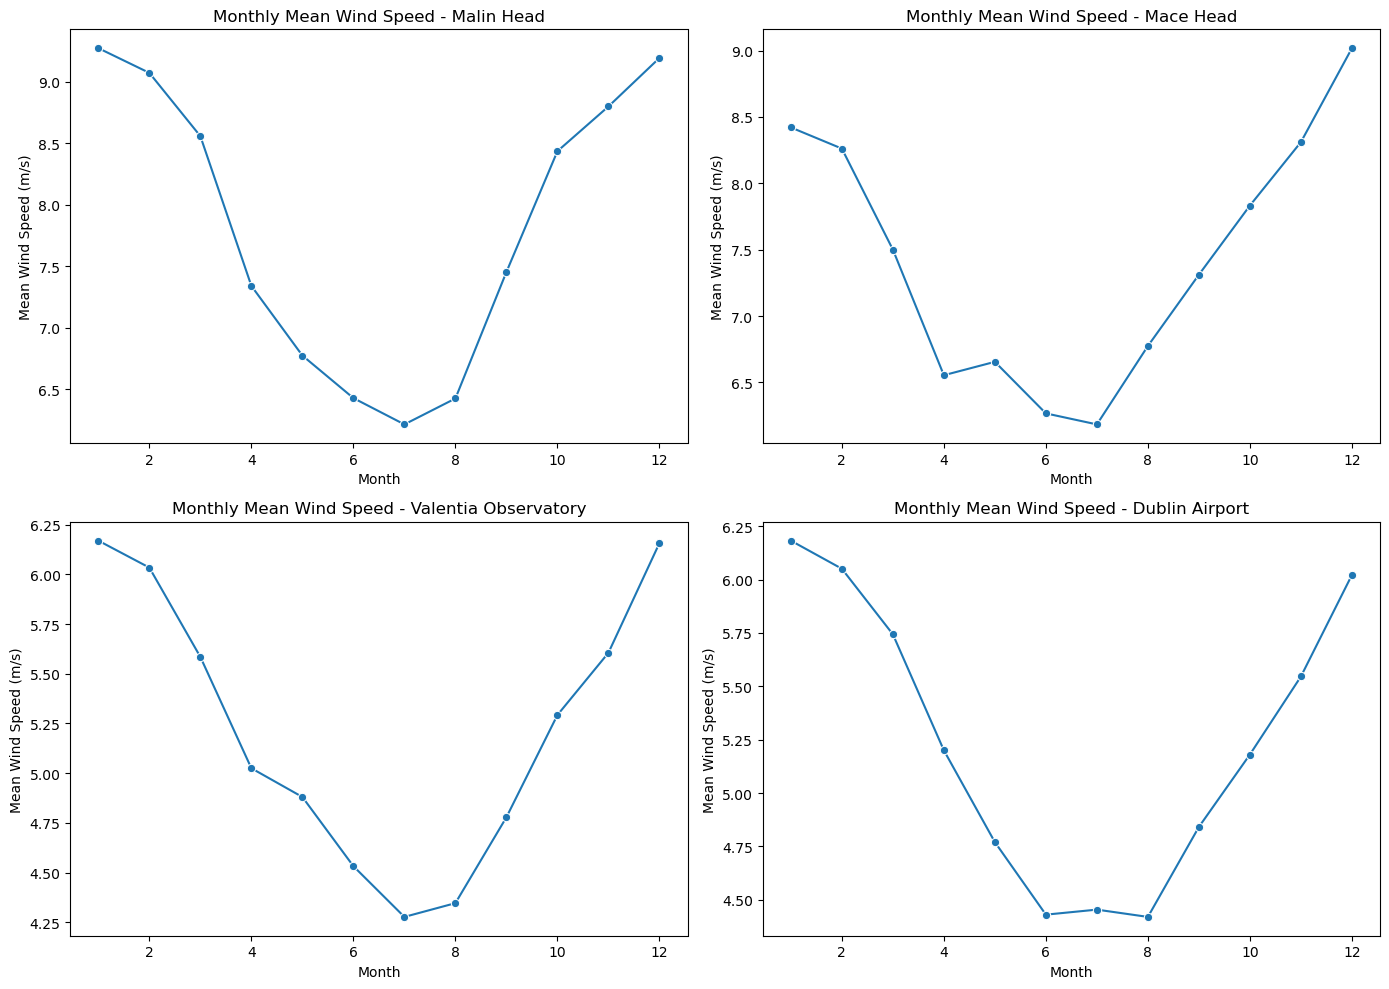

In [767]:
# Plot monthly mean wind speed for all stations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
for i, station in enumerate(stations.keys()):
    sns.lineplot(data=monthly_wind.loc[station], ax=axes[i], marker='o')
    axes[i].set_title(f'Monthly Mean Wind Speed - {station}')
    axes[i].set_ylabel('Mean Wind Speed (m/s)')
    axes[i].set_xlabel('Month')
plt.tight_layout()
plt.show()


What this shows:

* Winter months have the highest wind speeds across stations.

* Coastal stations (Malin Head, Mace Head) are windier than inland (Dublin Airport).

* Seasonal variations are clear: calmer in summer, stronger in winter.

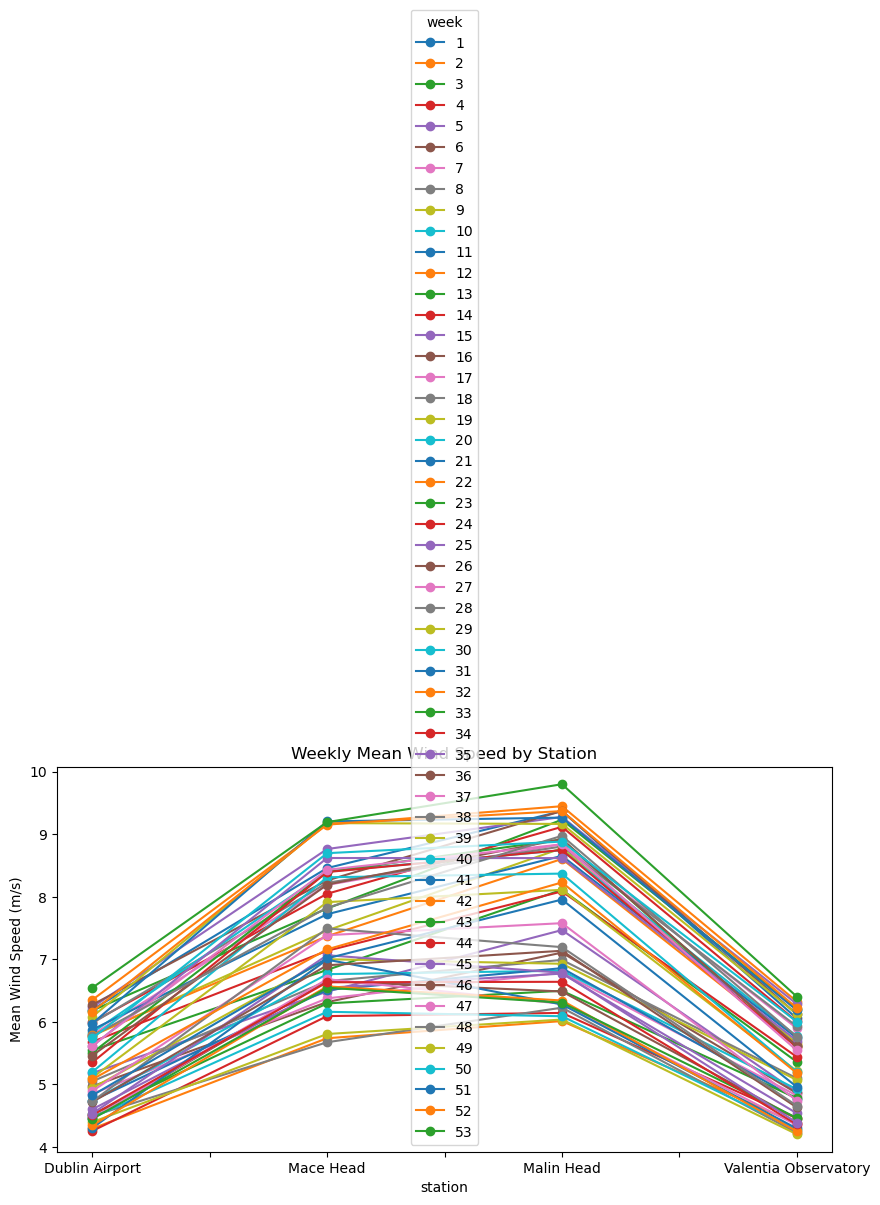

In [768]:
# Weekly mean wind speed
weekly_wind.plot(figsize=(10,5), marker='o')
plt.ylabel('Mean Wind Speed (m/s)')
plt.title('Weekly Mean Wind Speed by Station')
plt.show()


What this shows:

* Short-term fluctuations and patterns over the year.

* Can highlight periods of unusually high or low wind activity.

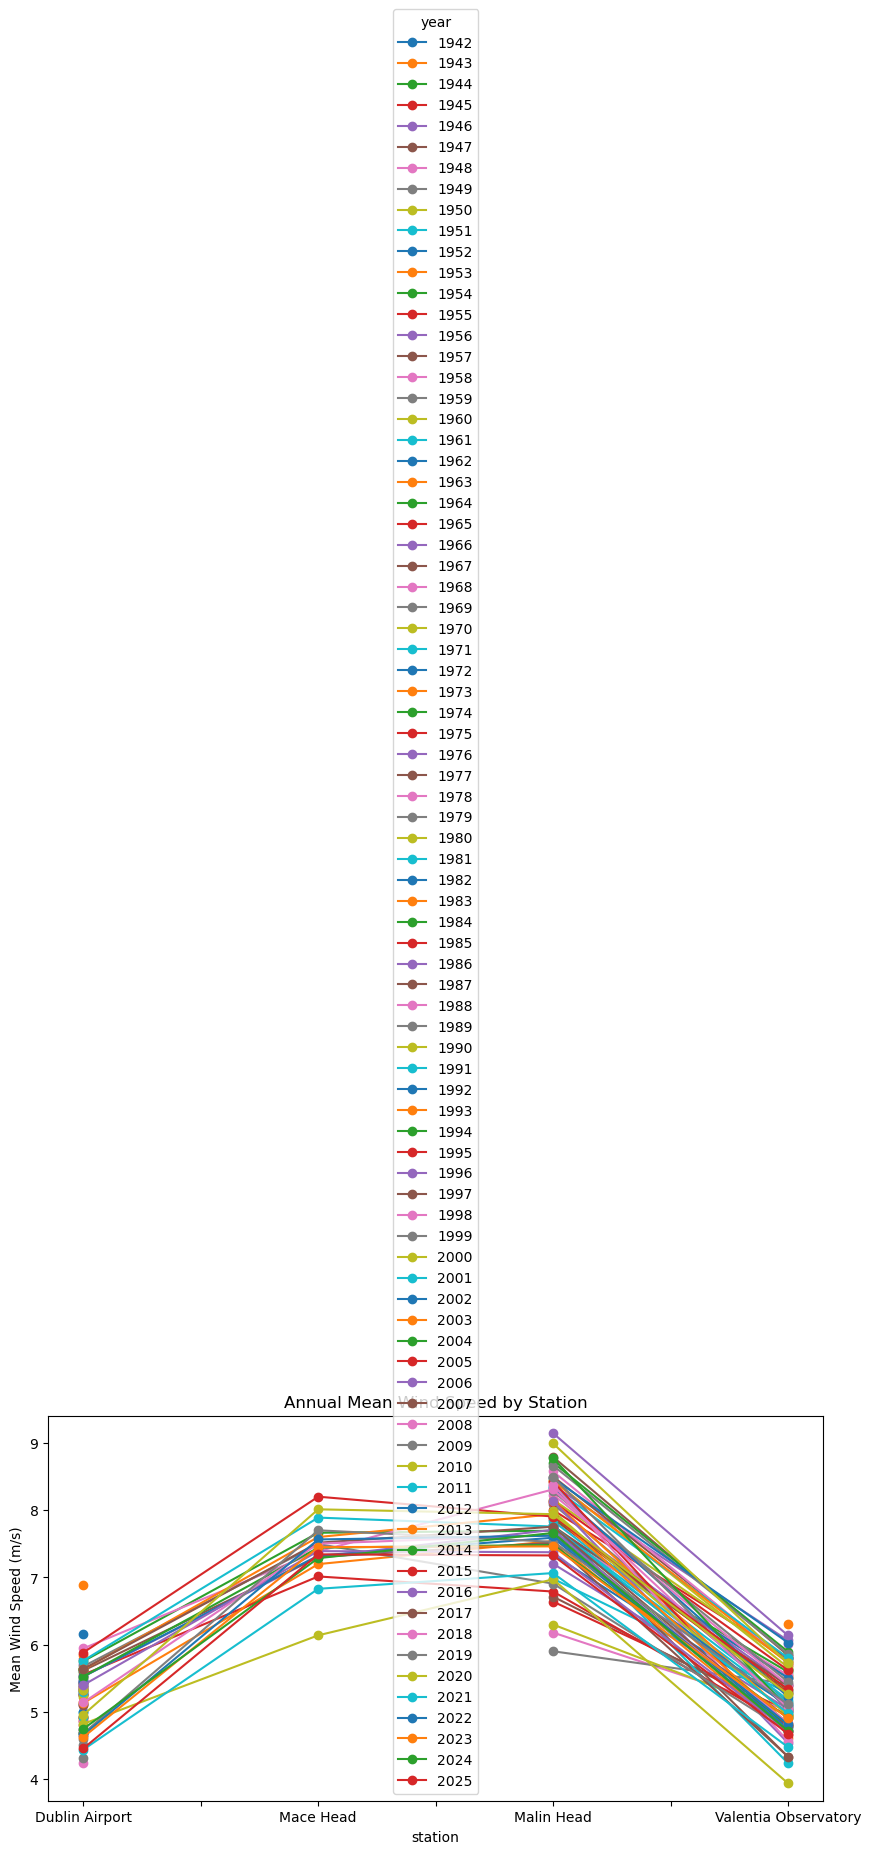

In [769]:
# Yearly mean wind speed
yearly_wind.plot(figsize=(10,5), marker='o')
plt.ylabel('Mean Wind Speed (m/s)')
plt.title('Annual Mean Wind Speed by Station')
plt.show()


What this shows:

* Long-term trend in wind speeds (before formal trend analysis).

* Coastal stations maintain higher annual averages than inland.

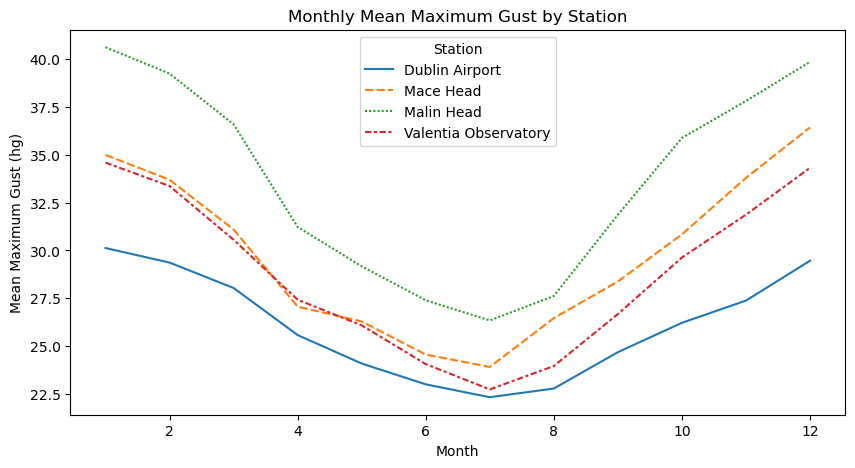

In [770]:
# Monthly mean maximum gusts
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=monthly_hg.T, ax=ax)  # Transpose so months are on x-axis
plt.ylabel('Mean Maximum Gust (hg)')
plt.xlabel('Month')
plt.title('Monthly Mean Maximum Gust by Station') 
plt.legend(title='Station')
plt.show()


Observation: Gusts are higher in winter months; coastal stations experience stronger gusts.

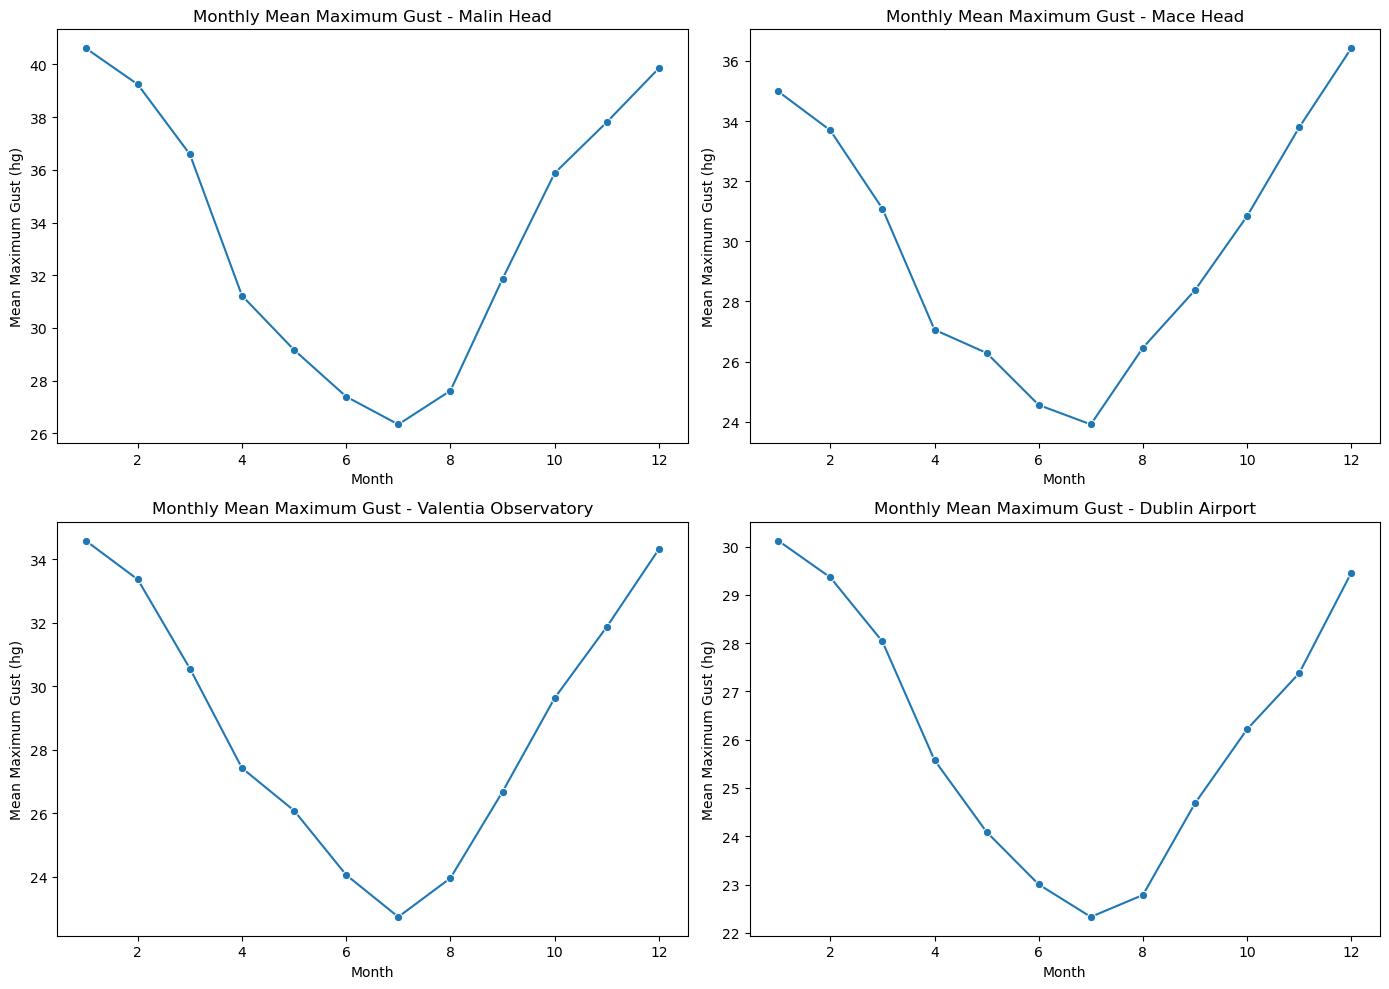

In [771]:
# Subplots for individual stations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
for i, station in enumerate(stations.keys()):
    sns.lineplot(data=monthly_hg.loc[station], ax=axes[i], marker='o')
    axes[i].set_title(f'Monthly Mean Maximum Gust - {station}')
    axes[i].set_ylabel('Mean Maximum Gust (hg)')
    axes[i].set_xlabel('Month')
plt.tight_layout()
plt.show()


Monthly Minimum Temperature (hm)

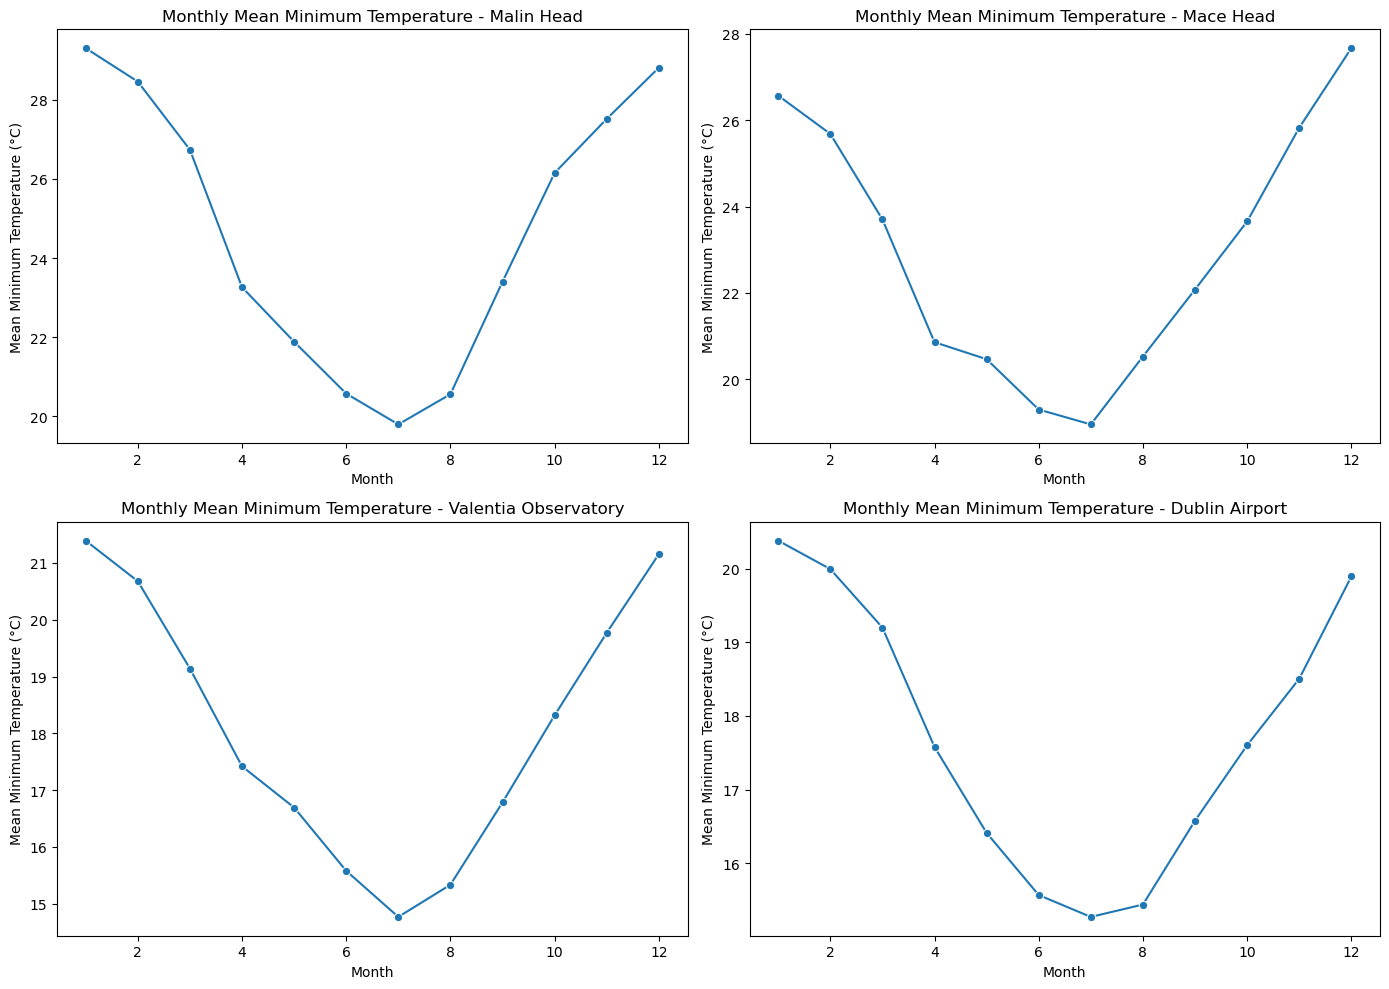

In [772]:
# Monthly mean minimum temperature
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
for i, station in enumerate(stations.keys()):
    sns.lineplot(data=monthly_hm.loc[station], ax=axes[i], marker='o')
    axes[i].set_title(f'Monthly Mean Minimum Temperature - {station}')
    axes[i].set_ylabel('Mean Minimum Temperature (°C)')
    axes[i].set_xlabel('Month')
plt.tight_layout()
plt.show()


* Coastal stations have milder winters, inland stations show colder minimum temperatures.

* Temperature can affect turbine efficiency and icing conditions.

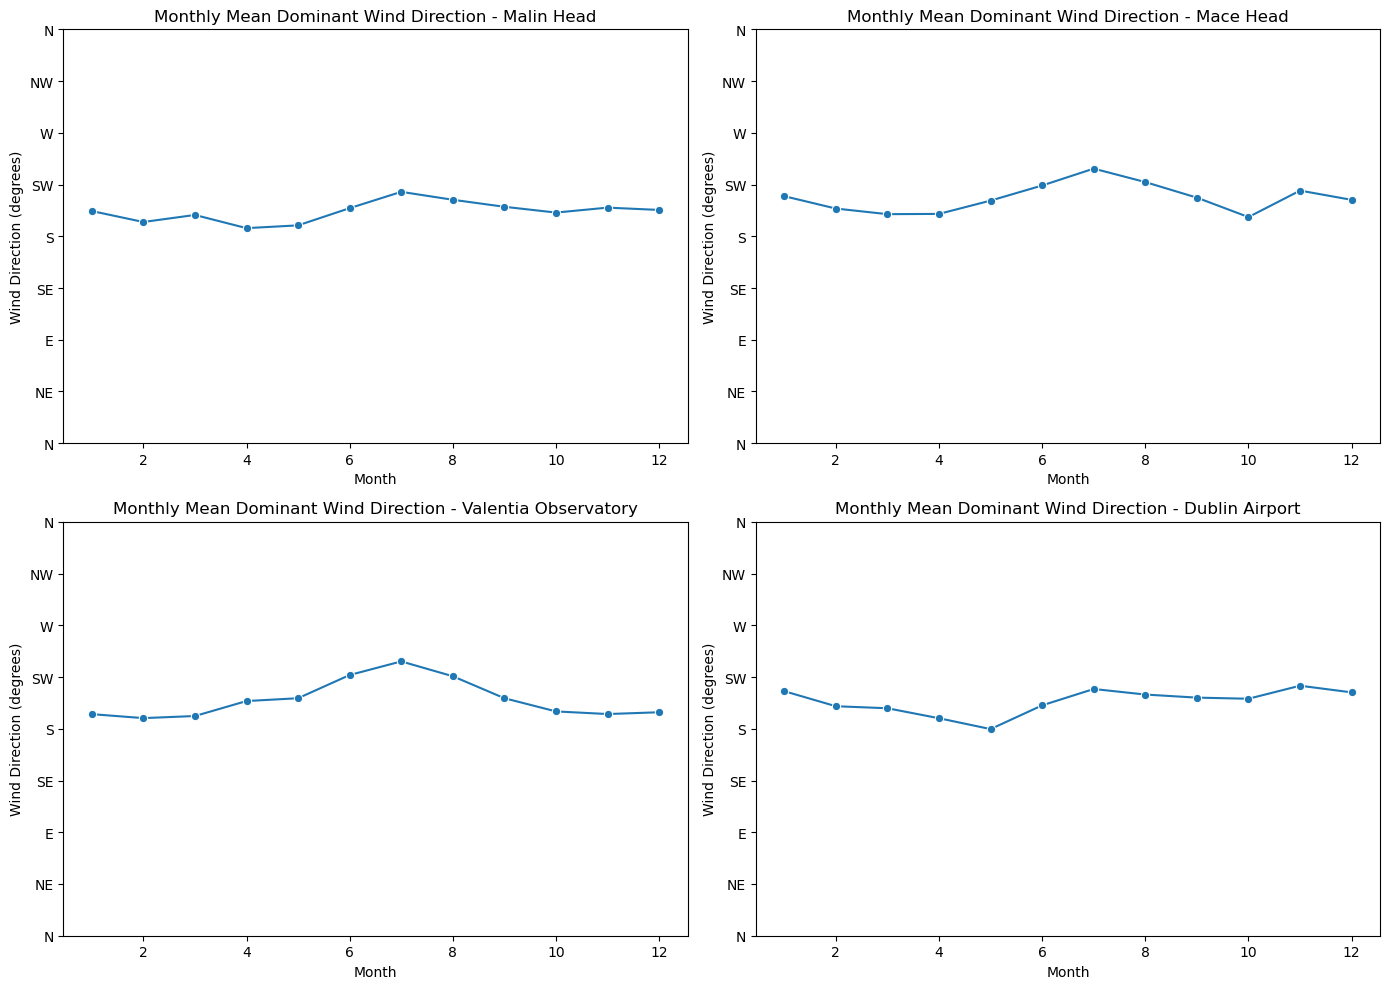

In [773]:
# Compass labels for wind direction
compass_labels = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW', 'N']
compass_ticks = np.arange(0, 361, 45)

# Plot monthly dominant wind direction
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
for i, station in enumerate(stations.keys()):
    sns.lineplot(data=monthly_ddhm.loc[station], ax=axes[i], marker='o')
    axes[i].set_title(f'Monthly Mean Dominant Wind Direction - {station}')
    axes[i].set_ylabel('Wind Direction (degrees)')
    axes[i].set_xlabel('Month')
    axes[i].set_yticks(compass_ticks)
    axes[i].set_yticklabels(compass_labels)
plt.tight_layout()
plt.show()


* Shows prevailing wind directions at each station.

* Coastal stations predominantly from SW–W, inland stations more variable.

* Important for turbine placement and wake effect planning.

## Summary of EDA Findings

- Coastal stations (Malin Head, Mace Head) are windier year-round than inland.

- Wind speeds and gusts peak in winter, drop in summer.

- Wind direction is relatively consistent at coastal stations, more variable inland.

- Temperature patterns show coastal moderation vs inland extremes.

- Weekly, monthly, and yearly aggregation reveals both seasonal patterns and long-term trends.